In [40]:
import pandas as pd 
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
import pickle
import seaborn as sns
import string
from unidecode import unidecode
from nltk.corpus import stopwords
import nltk
from nltk.stem import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from unidecode import unidecode

In [41]:
df = pd.read_csv('/home/ana/projects/IESB/Trabalho NLP/nominees_speech_2020.csv')

In [42]:
df

,Candidato,Ano,Speech
0,Biden,2020,"Good evening.Ella Baker, a giant of the civil ..."
1,Trump,2020,"Friends, delegates, and distinguished guests: ..."


### Clean

In [43]:
def text_process(mess):
    
    stemmer = nltk.stem.PorterStemmer()
    
    # # Retira pontuações
    text = [char for char in mess if char not in string.punctuation]

    # Junta-os para formar strings
    text = ''.join(text)

    # Remove as stopwords
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    # Junta-os para formar strings
    text = ' '.join(text)
    
    t = []
    for word in text.split():
        t.append(stemmer.stem(word))

    text = ' '.join(t)
    
    return text

  

In [44]:
def bigrams(texto): #dividndo pelo tamanho total 
    tokens = nltk.word_tokenize(texto)
    bigrams = nltk.bigrams(tokens)
    filtered_bigrams = [(w1, w2) for w1, w2 in bigrams if len(w1) >= 5 and len(w2) >= 5 if
                        w1 != 'janelacliqu' and w2 != 'compartilh' if w1 != "compartilh" if w1 != "janel" if
                        w1 != "insidebigdat" if w1 != "follow"]
    bifreq = nltk.FreqDist(filtered_bigrams)
    to_df = bifreq.most_common(1000)
    df = pd.DataFrame(to_df, columns=['bigrams', 'value'])
    df['bigrams'] = df['bigrams'].apply(lambda x: convert_list_to_string(x))
    df['value'] = df.value/len(df)
    return df

In [45]:
def convert_list_to_string(org_list, seperator=' '):
    return seperator.join(org_list)

In [46]:
df.columns = map(str.lower, df.columns)

In [47]:
df.candidato = df.candidato.apply(text_process)
df['speech_transformed'] = df.speech.apply(text_process)
df['speech'] = df.speech.str.lower()

In [48]:
df

,candidato,ano,speech,speech_transformed
0,biden,2020,"good evening.ella baker, a giant of the civil ...",good eveningella baker giant civil right movem...
1,trump,2020,"friends, delegates, and distinguished guests: ...",friend deleg distinguish guest stand tonight h...


In [49]:
# Biden
bigrams(df.speech[0])[:15]

,bigrams,value
0,million people,0.013986
1,current president,0.010490
2,young people,0.010490
3,social security,0.010490
4,united states,0.006993
5,about winning,0.006993
6,president obama,0.006993
7,climate change,0.006993
8,george floyd,0.006993
9,history rhyme,0.006993


In [50]:
# Trump
bigrams(df.speech[1])[:15]

,bigrams,value
0,united states,0.006046
1,decide whether,0.004837
2,democrat-run cities,0.004837
3,republican party,0.003628
4,abraham lincoln,0.003628
5,american workers,0.003628
6,school choice,0.003628
7,loved their,0.003628
8,always protect,0.002418
9,america against,0.002418


In [52]:
def inspeech():
    expression = input("What is the expression you are searching for? ")
    if expression in df.speech[0] and expression in df.speech[1]:
      return "Trump and Biden are talking about " + expression
    if expression in df.speech[0]:
      return "Only Biden is talking about " + expression
    elif expression in df.speech[1]:
      return "Only Trump is talking about " + expression    
    else:
      return "No one is talking about " + expression

In [57]:
inspeech()

'No one is talking about dasiuhdasiuh'

In [35]:
biden = df.speech_transformed[0]
trump = df.speech_transformed[1]

In [36]:
def context(word,text):
    return re.compile("(?:[^ ]+ ){0,10}" + word + "\s(?:[^ ]+ ){0,10}").findall(text)

'great depressionthe compelling call racial justice since 60′s undeniable realities accelerating threats climate changeso question us simple readyi believe must elections important praise essential workers we’re finally going pay themwe deal climate change it’s crisis it’s enormous opportunity opportunity america lead world clean hear voices listen hear whether it’s existential threat posed climate change daily fear gunned school inability get started first job'

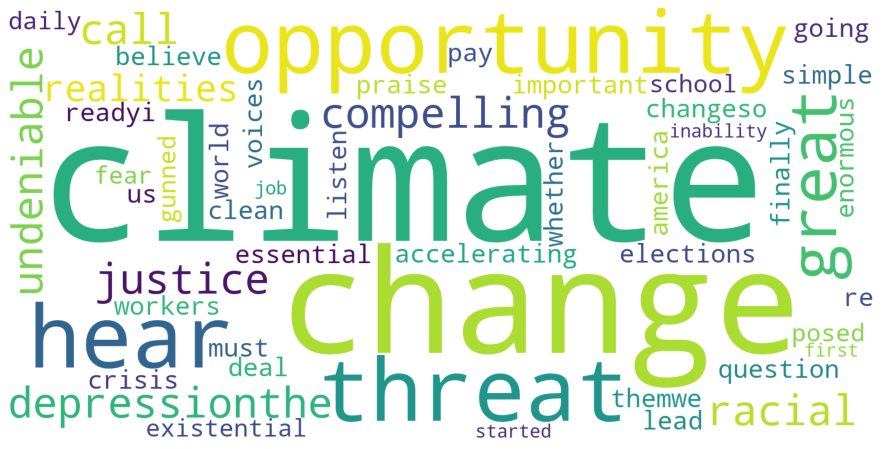

In [58]:
context('climate',df.speech[0])

In [59]:
def context(word,text):
    r = re.compile("(?:[^ ]+ ){0,20}" + word + "\s(?:[^ ]+ ){0,20}").findall(text)
    r = convert_list_to_string(r)
    r = r.translate(str.maketrans('', '', string.punctuation))
    r = [word for word in r.split() if word.lower() not in stopwords.words('english')]
    r = ' '.join(r)

    wordcloud = WordCloud(background_color='white', width=1600,                            
                      height=800).generate(r)

    fig, ax = plt.subplots(figsize=(16,8))            
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()                


    return plt.imshow(wordcloud) and r

## Climate

'great depressionthe compelling call racial justice since 60′s undeniable realities accelerating threats climate changeso question us simple readyi believe must elections important praise essential workers we’re finally going pay themwe deal climate change it’s crisis it’s enormous opportunity opportunity america lead world clean hear voices listen hear whether it’s existential threat posed climate change daily fear gunned school inability get started first job'

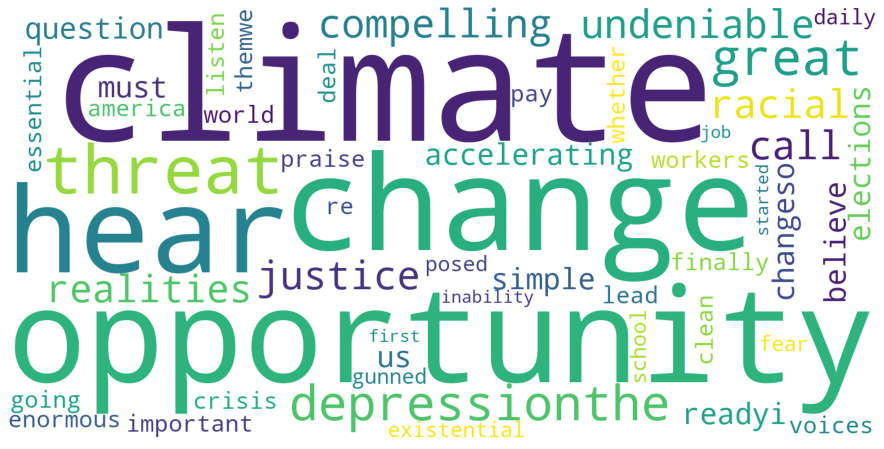

In [60]:
# Biden sobre climate 
context('climate',df.speech[0])

'jobkilling trans pacific partnership approved keystone xl dakota access pipelines ended unfair costly paris climate accord secured first time american energy independence passed recordsetting tax regulation cuts rate'

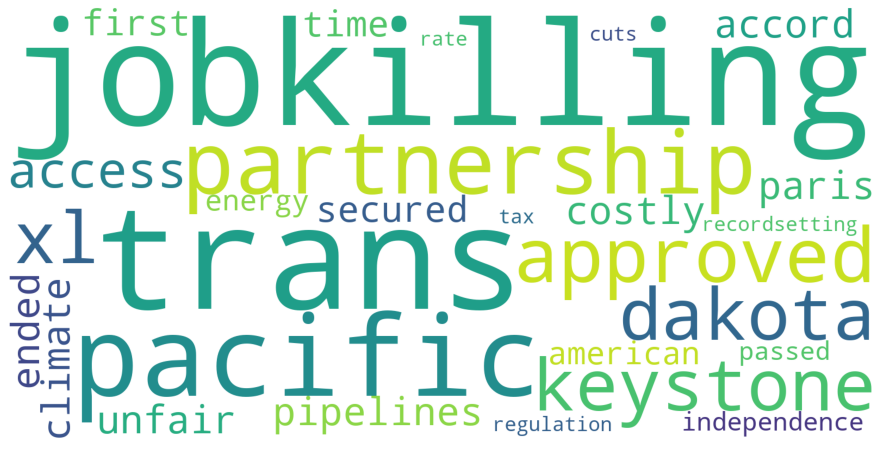

In [61]:
# Biden sobre climate 
context('climate',df.speech[1])

'farleft senator bernie sanders bidenbernie manifesto calls suspending removals illegal aliens implementing nationwide catchandrelease providing illegal aliens free taxpayerfunded lawyers joe biden recently raised hand debate stage promised give away'

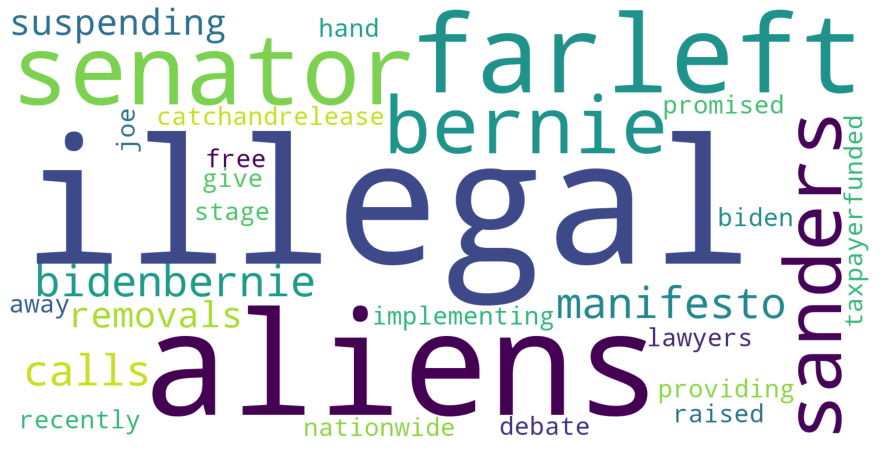

In [20]:
# Trump
context('illegal aliens',df.speech[1])

'criminal justice reform prison reform opportunity zones longterm funding historically black colleges universities china virus came produced best unemployment numbers africanamericans hispanicamericans asianamericans ever recorded done lives tragically taken honor unite memory overcomewhen china virus hit launched largest national mobilization since world war ii invoking defense production act produced worlds'

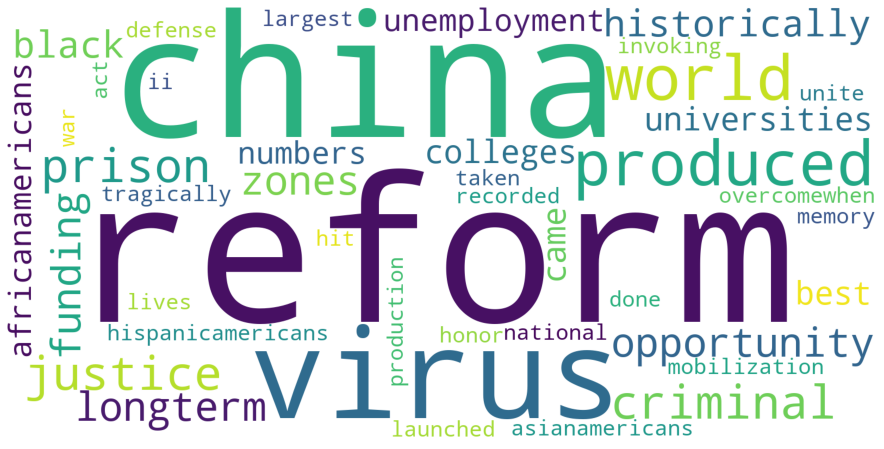

In [21]:
context('virus',df.speech[1])

'america rebuild togetheras president first step take get control virus that’s ruined many lives understand something president doesn’t never get economy back bad canada europe japan almost anywhere else worldthe president keeps telling us virus going disappear keeps waiting miracle well news miracle comingwe'

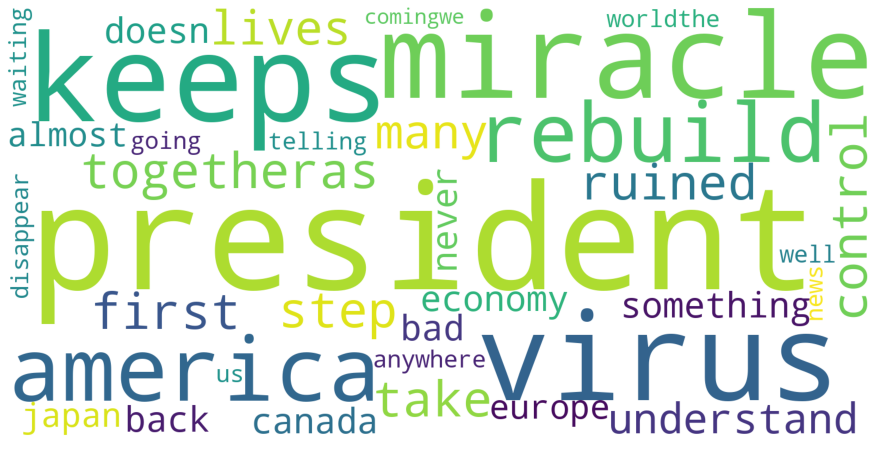

In [73]:
context('virus',df.speech[0])

'farleft senator bernie sanders bidenbernie manifesto calls suspending removals illegal aliens implementing nationwide catchandrelease providing illegal aliens free taxpayerfunded lawyers joe biden recently raised hand debate stage promised give away'

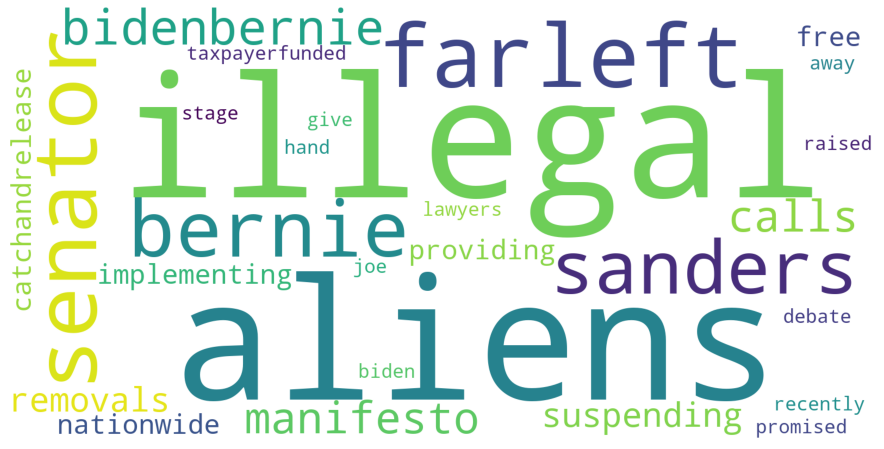

In [74]:
context('illegal aliens',df.speech[1])

'farleft senator bernie sanders bidenbernie manifesto calls suspending removals illegal aliens implementing nationwide catchandrelease providing illegal aliens free taxpayerfunded lawyers joe biden recently raised hand debate stage promised give away'

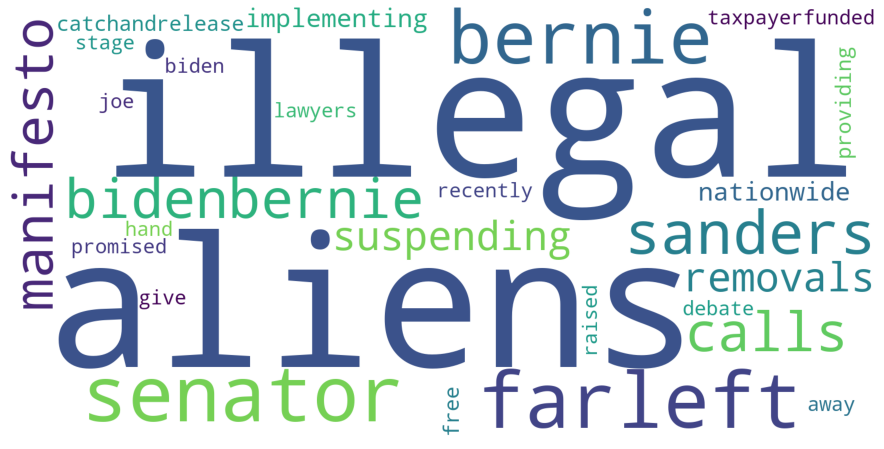

In [75]:
context('illegal aliens',df.speech[1])

In [ ]:
context('illegal aliens',df.speech[1])